In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv('train.csv')

train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
train_data.shape

(7613, 5)

In [4]:
#preprocessing text
import re
def clean(Text):
  sms = re.sub('[^a-zA-Z]',' ',Text) #replacing all non-alpha with space
  sms = sms.lower().split()
  sms = ' '.join(sms)
  return sms

train_data['clean_text'] = train_data['text'].apply(clean)

In [5]:
print(*train_data["clean_text"][:5],sep='\n')

our deeds are the reason of this earthquake may allah forgive us all
forest fire near la ronge sask canada
all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected
people receive wildfires evacuation orders in california
just got sent this photo from ruby alaska as smoke from wildfires pours into a school


In [6]:
train_data.head()

,id,keyword,location,text,target,clean_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in ...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...


In [7]:
count_key = train_data['keyword'].isnull().sum()

print(count_key)

61


In [8]:
count_loc = train_data['location'].isnull().sum()
print(count_loc)

2533


In [9]:
train_data['clean_keyword'] = train_data['keyword'].fillna('').apply(clean)

In [10]:
train_data['clean_location'] = train_data['location'].fillna('').apply(clean)

In [11]:
train_data.head()

,id,keyword,location,text,target,clean_text,clean_keyword,clean_location
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,,
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,,
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,,
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in ...,,
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,,


In [12]:
train_data['combined_text'] = train_data['clean_text']+' '+train_data['clean_keyword']+' '+train_data['clean_location']

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [14]:
nltk.download('punkt_tab')
train_data['tokenize_text'] = train_data['combined_text'].apply(word_tokenize)
print(*train_data['tokenize_text'][:5],sep='\n')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['our', 'deeds', 'are', 'the', 'reason', 'of', 'this', 'earthquake', 'may', 'allah', 'forgive', 'us', 'all']
['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada']
['all', 'residents', 'asked', 'to', 'shelter', 'in', 'place', 'are', 'being', 'notified', 'by', 'officers', 'no', 'other', 'evacuation', 'or', 'shelter', 'in', 'place', 'orders', 'are', 'expected']
['people', 'receive', 'wildfires', 'evacuation', 'orders', 'in', 'california']
['just', 'got', 'sent', 'this', 'photo', 'from', 'ruby', 'alaska', 'as', 'smoke', 'from', 'wildfires', 'pours', 'into', 'a', 'school']


In [15]:
def remove_stopwords(text):
  stop_words = set(nltk.corpus.stopwords.words('english'))
  filtered_text  = [words for words in text if words not in stop_words]
  return filtered_text

train_data['stop_words_removed'] = train_data['tokenize_text'].apply(remove_stopwords)

print(*train_data['stop_words_removed'][:5],sep='\n')

['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us']
['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada']
['residents', 'asked', 'shelter', 'place', 'notified', 'officers', 'evacuation', 'shelter', 'place', 'orders', 'expected']
['people', 'receive', 'wildfires', 'evacuation', 'orders', 'california']
['got', 'sent', 'photo', 'ruby', 'alaska', 'smoke', 'wildfires', 'pours', 'school']


In [16]:
train_data.head()

,id,keyword,location,text,target,clean_text,clean_keyword,clean_location,combined_text,tokenize_text,stop_words_removed
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,,,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,,,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,,,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in ...,,,people receive wildfires evacuation orders in ...,"[people, receive, wildfires, evacuation, order...","[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,,,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


<Figure size 1200x800 with 0 Axes>

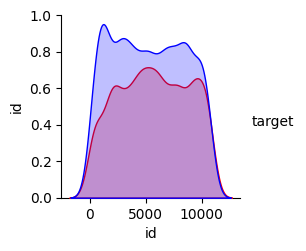

(7613, 11)

<Figure size 640x480 with 0 Axes>

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
cols = ["blue","red"]
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=train_data,hue="target",palette=cols)
plt.show(fg)
plt.savefig('pairplot.png')
train_data.shape

In [19]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
  lemmatized_text = [lemmatizer.lemmatize(word,pos='v') for word in text]
  return lemmatized_text

train_data['lemmatize_text'] = train_data['stop_words_removed'].apply(lemmatize_text)

print(*train_data['lemmatize_text'][:5],sep='\n')

['deeds', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'us']
['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada']
['residents', 'ask', 'shelter', 'place', 'notify', 'officer', 'evacuation', 'shelter', 'place', 'order', 'expect']
['people', 'receive', 'wildfires', 'evacuation', 'order', 'california']
['get', 'send', 'photo', 'ruby', 'alaska', 'smoke', 'wildfires', 'pour', 'school']


In [20]:
train_data.head()

,id,keyword,location,text,target,clean_text,clean_keyword,clean_location,combined_text,tokenize_text,stop_words_removed,lemmatize_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake ma...,,,our deeds are the reason of this earthquake ma...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...","[deeds, reason, earthquake, may, allah, forgiv..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,,,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are be...,,,all residents asked to shelter in place are be...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...","[residents, ask, shelter, place, notify, offic..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders in ...,,,people receive wildfires evacuation orders in ...,"[people, receive, wildfires, evacuation, order...","[people, receive, wildfires, evacuation, order...","[people, receive, wildfires, evacuation, order..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as s...,,,just got sent this photo from ruby alaska as s...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...","[get, send, photo, ruby, alaska, smoke, wildfi..."


In [21]:
corpus = []
for i in train_data['lemmatize_text']:
  msg = ' '.join(row for row in i)
  corpus.append(msg)

print(*corpus[:5],sep='\n')

deeds reason earthquake may allah forgive us
forest fire near la ronge sask canada
residents ask shelter place notify officer evacuation shelter place order expect
people receive wildfires evacuation order california
get send photo ruby alaska smoke wildfires pour school


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(corpus).toarray()

print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [23]:
from sklearn.model_selection import train_test_split

y = train_data['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.6421536441234406


In [25]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)
print(accuracy_score(y_test,y_pred2))

0.7655942219304005


Accuracy: 0.7656

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       886
           1       0.76      0.64      0.69       637

    accuracy                           0.77      1523
   macro avg       0.77      0.75      0.75      1523
weighted avg       0.77      0.77      0.76      1523

Confusion Matrix:
[[760 126]
 [231 406]]


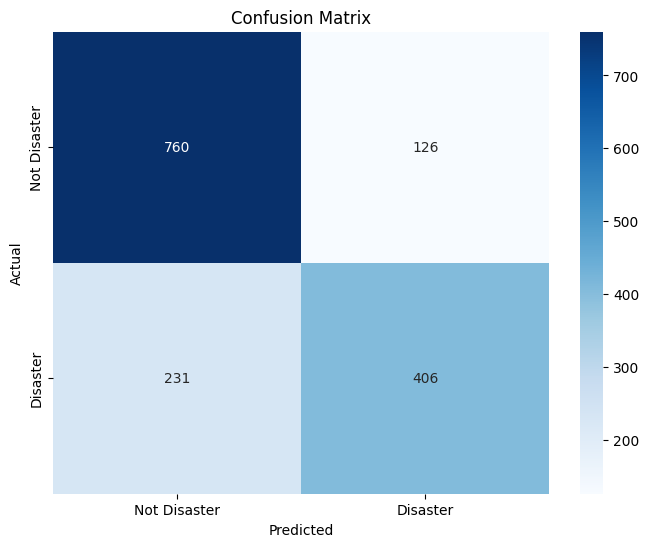

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

# Print the accuracy you already have
print(f"Accuracy: {accuracy_score(y_test, y_pred2):.4f}\n")

# Print a more detailed report
print("Classification Report:")
print(classification_report(y_test, y_pred2))

# Print the confusion matrix
# This shows you True Positives, True Negatives, False Positives, and False Negatives
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))
cm = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Disaster', 'Disaster'], yticklabels=['Not Disaster', 'Disaster'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

In [27]:
test_data = pd.read_csv('test.csv')
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid_search = GridSearchCV(estimator=MultinomialNB(),
                           param_grid={'alpha': [0.1, 0.5, 1.0, 5.0]},
                           cv=5,
                           scoring='f1_macro',
                           verbose=1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print(f"Best alpha found: {grid_search.best_params_}")

y_pred_final = best_model.predict(X_test)

print("\n--- Performance on Unseen Test Set ---")
print(classification_report(y_test, y_pred_final))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best alpha found: {'alpha': 0.5}

--- Performance on Unseen Test Set ---
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       874
           1       0.78      0.70      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523



In [29]:
tfidf = TfidfVectorizer(ngram_range=(1, 2), min_df=2)

# Create the feature matrix from the FULL training corpus
# (corpus should be built from the full train_data)
X = tfidf.fit_transform(corpus).toarray()
y = train_data['target']

In [30]:
final_model = MultinomialNB(alpha=0.5)

# Fit it on the ENTIRE training dataset (X and y)
final_model.fit(X, y)
print("Final model trained on all available training data.")

Final model trained on all available training data.


In [31]:
test_data['clean_text'] = test_data['text'].apply(clean)
test_data['clean_keyword'] = test_data['keyword'].fillna('').apply(clean)
test_data['clean_location'] = test_data['location'].fillna('').apply(clean)
test_data['combined_text'] = test_data['clean_text']+' '+test_data['clean_keyword']+' '+test_data['clean_location']
test_data.head()
test_data['tokenize_text'] = test_data['combined_text'].apply(word_tokenize)
test_data['stop_words_removed'] = test_data['tokenize_text'].apply(remove_stopwords)
test_data['lemmatize_text'] = test_data['stop_words_removed'].apply(lemmatize_text)
test_data.head()

,id,keyword,location,text,clean_text,clean_keyword,clean_location,combined_text,tokenize_text,stop_words_removed,lemmatize_text
0,0,NaN,NaN,Just happened a terrible car crash,just happened a terrible car crash,,,just happened a terrible car crash,"[just, happened, a, terrible, car, crash]","[happened, terrible, car, crash]","[happen, terrible, car, crash]"
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",heard about earthquake is different cities sta...,,,heard about earthquake is different cities sta...,"[heard, about, earthquake, is, different, citi...","[heard, earthquake, different, cities, stay, s...","[hear, earthquake, different, cities, stay, sa..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are ...,,,there is a forest fire at spot pond geese are ...,"[there, is, a, forest, fire, at, spot, pond, g...","[forest, fire, spot, pond, geese, fleeing, acr...","[forest, fire, spot, pond, geese, flee, across..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires,,,apocalypse lighting spokane wildfires,"[apocalypse, lighting, spokane, wildfires]","[apocalypse, lighting, spokane, wildfires]","[apocalypse, light, spokane, wildfires]"
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills in china and taiwan,,,typhoon soudelor kills in china and taiwan,"[typhoon, soudelor, kills, in, china, and, tai...","[typhoon, soudelor, kills, china, taiwan]","[typhoon, soudelor, kill, china, taiwan]"


In [32]:
corpus_test = []
for i in test_data['lemmatize_text']:
    msg = ' '.join(row for row in i)
    corpus_test.append(msg)

In [33]:
X_final_test = tfidf.transform(corpus_test).toarray()

# Use the final_model to make predictions
final_predictions = final_model.predict(X_final_test)

In [34]:
# Create the submission DataFrame
submission_df = pd.DataFrame({'id': test_data.id, 'target': final_predictions})

# Save the file
submission_df.to_csv('submission1.csv', index=False)

print("\nFinal submission.csv created successfully! You are ready to submit to Kaggle.")


Final submission.csv created successfully! You are ready to submit to Kaggle.
